<a href="https://colab.research.google.com/github/Shrutakeerti/machine-learning-repos/blob/main/FashionClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Requirements
import random
random.seed(0)

import pandas as pd
import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
#load the dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Data Processing

In [4]:
type(train_images)

numpy.ndarray

In [6]:
type(train_labels)

numpy.ndarray

In [7]:
print(len(train_images))

60000


In [8]:
print(len(train_labels))

60000


In [9]:
print(train_images[0].shape)

(28, 28)


In [10]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

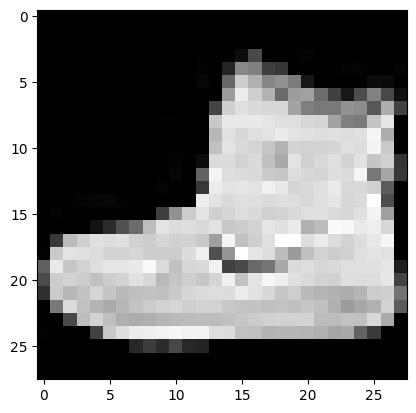

In [11]:
#displaying the image
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [12]:
print(train_labels[0])

9


In [13]:
#normalize pixels value to be between 0 and 1
train_images,test_images = train_images/255.0, test_images/255.0

In [15]:
#reshape images to specify (single channel)
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

Conventional Neural Network

In [16]:
#build it
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

#add layer
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


In [17]:
# compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model Train

In [18]:
history = model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 15s 5ms/step - loss: 0.4889 - accuracy: 0.8217 - val_loss: 0.3716 - val_accuracy: 0.8671
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3195 - accuracy: 0.8827 - val_loss: 0.3168 - val_accuracy: 0.8879
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2714 - accuracy: 0.9003 - val_loss: 0.2922 - val_accuracy: 0.8941
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2425 - accuracy: 0.9101 - val_loss: 0.2739 - val_accuracy: 0.8990
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2183 - accuracy: 0.9189 - val_loss: 0.2777 - val_accuracy: 0.9016


Model Evaluation

In [19]:
#evaluate the model
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 1s - loss: 0.2777 - accuracy: 0.9016 - 676ms/epoch - 2ms/step

Test accuracy: 0.9016000032424927


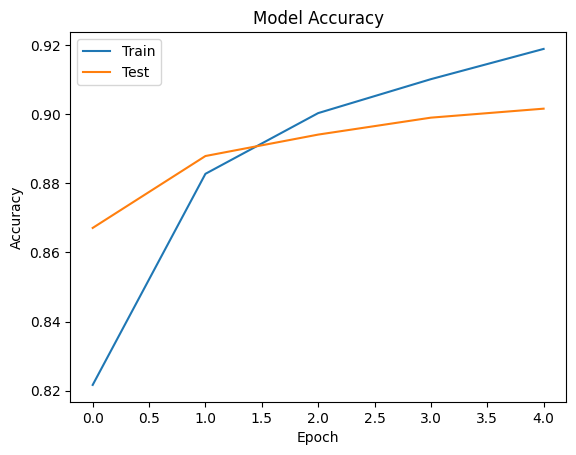

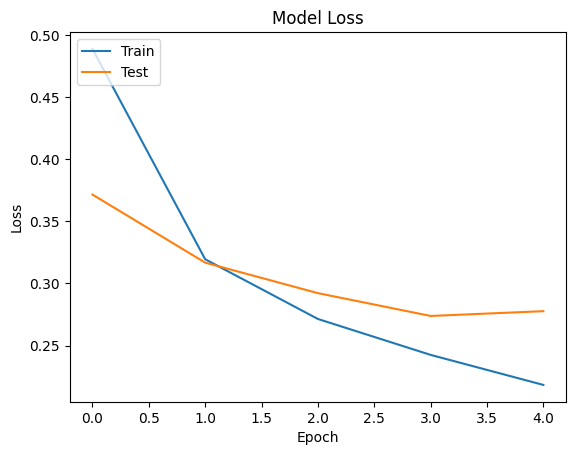

In [22]:
#plot training the validate
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [23]:
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
